In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

# Phase 1

In [85]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
wk = pd.read_csv(StringIO(s))

In [86]:
wk.head()

Name  Rating  Country Category  Price  \
0        Canadian Hunter Canadian Whisky    40.0   Canada  Blended    9.0   
1  Canadian LTD Blended Canadian Whiskey    43.0   Canada  Blended   10.0   
2                   Kellan Irish Whiskey    47.0  Ireland  Blended   20.0   
3            Rich & Rare Canadian Whisky    47.0   Canada  Blended   10.0   
4  Canadian Mist Blended Canadian Whisky    48.0   Canada  Blended   12.0   

    ABV  Age            Brand  
0  40.0  NaN  Canadian Hunter  
1   NaN  NaN     Canadian LTD  
2  40.0  NaN           Kellan  
3   NaN  NaN      Rich & Rare  
4  40.0  NaN    Canadian Mist

In [87]:
wk.drop('Name',axis=1,inplace=True)
wk.drop('Country',axis=1,inplace=True)
wk.drop('Category',axis=1,inplace=True)
wk.drop('Age',axis=1,inplace=True)
wk.drop('Brand',axis=1,inplace=True)

In [88]:
wk.head()

Rating  Price   ABV
0    40.0    9.0  40.0
1    43.0   10.0   NaN
2    47.0   20.0  40.0
3    47.0   10.0   NaN
4    48.0   12.0  40.0

In [89]:
wk.isna().sum()

Rating    11
Price      4
ABV       13
dtype: int64

In [90]:
wk.describe()

Rating       Price         ABV
count  272.000000  279.000000  270.000000
mean    84.474265   72.483871   44.610444
std     11.877887   83.992242    5.883056
min     40.000000    2.000000   35.500000
25%     80.000000   30.000000   40.000000
50%     88.000000   50.000000   43.000000
75%     94.000000   80.000000   46.000000
max    100.000000  850.000000   68.200000

In [91]:
wk.dropna(inplace = True)

In [92]:
data = wk.values

# Delete outlier

In [93]:
def outlier(x):
    q1, q3 = np.percentile(x,[25, 75])
    iqr = q3 - q1
    cut = 1.5 * iqr  
    return [i for i in range(x.shape[0]) if x[i] < q1-cut or x[i]>q3+cut]

def all_out(x):
    idx = []
    for i in range(x.shape[1]):
        idx = np.concatenate((idx, outlier(x[:,i])))
    return list(set(idx))

In [94]:
idx = all_out(data)
print(len(idx),idx)
data = np.delete(data, idx, axis=0)
print(data.shape)
print(data)

49 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 132.0, 259.0, 133.0, 141.0, 256.0, 143.0, 257.0, 155.0, 156.0, 158.0, 159.0, 160.0, 162.0, 46.0, 174.0, 176.0, 51.0, 59.0, 60.0, 67.0, 195.0, 197.0, 199.0, 202.0, 208.0, 80.0, 210.0, 213.0, 214.0, 89.0, 220.0, 97.0, 227.0, 100.0, 229.0, 232.0, 254.0, 125.0, 126.0]
(211, 3)
[[ 64.    30.    40.  ]
 [ 64.    20.    40.  ]
 [ 65.    24.    40.  ]
 [ 65.    25.    40.  ]
 [ 67.    35.    40.  ]
 [ 67.    50.    43.  ]
 [ 67.    60.    40.  ]
 [ 67.    65.    40.  ]
 [ 67.    14.    40.  ]
 [ 68.    25.    40.  ]
 [ 68.    12.    40.  ]
 [ 69.    23.    40.  ]
 [ 69.    23.    40.  ]
 [ 69.    15.    40.  ]
 [ 69.    27.    45.  ]
 [ 69.    20.    40.  ]
 [ 70.    45.    43.  ]
 [ 70.    26.    40.  ]
 [ 71.    27.    40.  ]
 [ 71.    50.    43.  ]
 [ 72.    48.    46.  ]
 [ 73.    84.    40.  ]
 [ 73.    90.    40.  ]
 [ 74.    90.    46.  ]
 [ 74.    40.    40.  ]
 [ 74.    50.    45.  ]
 [ 74.    58.    40.  ]
 [ 75.    85.    43.  ]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


# Convert to MinMax normalization

In [95]:
data = MinMaxScaler().fit_transform(data)
print(data)

[[0.         0.14728682 0.234375  ]
 [0.         0.06976744 0.234375  ]
 [0.02777778 0.10077519 0.234375  ]
 [0.02777778 0.10852713 0.234375  ]
 [0.08333333 0.18604651 0.234375  ]
 [0.08333333 0.30232558 0.390625  ]
 [0.08333333 0.37984496 0.234375  ]
 [0.08333333 0.41860465 0.234375  ]
 [0.08333333 0.02325581 0.234375  ]
 [0.11111111 0.10852713 0.234375  ]
 [0.11111111 0.00775194 0.234375  ]
 [0.13888889 0.09302326 0.234375  ]
 [0.13888889 0.09302326 0.234375  ]
 [0.13888889 0.03100775 0.234375  ]
 [0.13888889 0.12403101 0.49479167]
 [0.13888889 0.06976744 0.234375  ]
 [0.16666667 0.26356589 0.390625  ]
 [0.16666667 0.11627907 0.234375  ]
 [0.19444444 0.12403101 0.234375  ]
 [0.19444444 0.30232558 0.390625  ]
 [0.22222222 0.28682171 0.546875  ]
 [0.25       0.56589147 0.234375  ]
 [0.25       0.6124031  0.234375  ]
 [0.27777778 0.6124031  0.546875  ]
 [0.27777778 0.2248062  0.234375  ]
 [0.27777778 0.30232558 0.49479167]
 [0.27777778 0.36434109 0.234375  ]
 [0.30555556 0.57364341 0.39

In [96]:
label = np.array(['low' if d <= 1/3  else 'medium' if d <= 2/3 else 'high' for d in data[:,0]]) # Convert rating to low medium high

In [99]:
"""wk = pd.DataFrame(data={"Price":(data[:,1]),
                        "ABV":(data[:,2]),
                         "Rating":(label)})"""

wk = pd.DataFrame(data={"Price":(data[:,1]),
                        "ABV":(data[:,2]),
                         "Rating":(data[:,0])})

# Plot before Clustering

Text(0,0.5,'Rating')

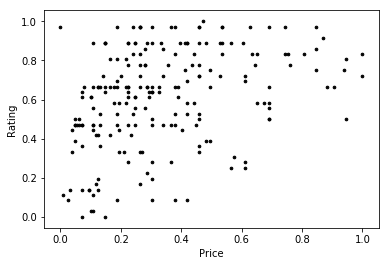

In [109]:
f1 = wk['Price'].values
f2 = wk['Rating'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)
plt.xlabel('Price')
plt.ylabel('Rating')

Text(0,0.5,'Rating')

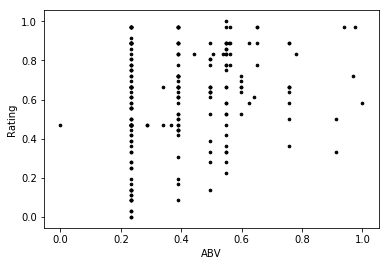

In [110]:
f1 = wk['ABV'].values
f2 = wk['Rating'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)
plt.xlabel('ABV')
plt.ylabel('Rating')

# Use K-means Algorithm

# Workflow 1

In [142]:
def Kmeans(number, attribute):
    k = KMeans(n_clusters=number)
    #k.fit(wk.drop('Rating',axis=1))
    k.fit(wk[[attribute, 'Rating']])
    print('Centroid =',k.cluster_centers_)
    k.labels_
    plt.scatter(wk[attribute].values,wk['Rating'].values, c=k.labels_, cmap='rainbow')
    plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], marker='*', c='black', s=150)
    plt.xlabel(attribute)
    plt.ylabel('Rating')
    
    return k.labels_

Centroid = [[0.47043624 0.80528322]
 [0.21406728 0.42889908]]
cluser group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


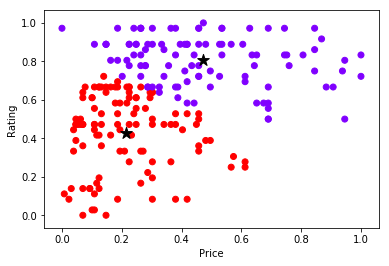

In [143]:
k2price = Kmeans(2,'Price')
print("cluser group:",k2price)

Centroid = [[0.72215422 0.77704678]
 [0.21694807 0.33028919]
 [0.2803876  0.7525    ]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 2 1 2 2 1 2 0 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 0 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 2 0 2 2 0 0 2 0 0 0 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 2 0 2 0 0 0 2 0 2 2 2 2 2 2 2 2 0 2]


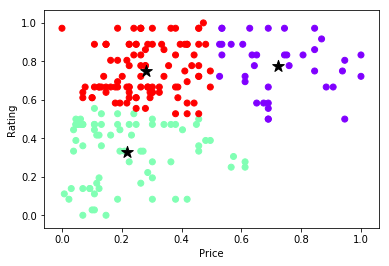

In [144]:
k3price = Kmeans(3,'Price')
print("cluster group:",k3price)

Centroid = [[0.24826078 0.20797721]
 [0.34396099 0.85439068]
 [0.76394099 0.75358423]
 [0.21047984 0.5625879 ]]
cluster group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 2 3 3
 3 3 3 3 3 3 2 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 3 3
 3 3 3 3 3 3 3 1 3 1 3 3 2 3 3 3 2 1 3 2 2 1 1 1 3 1 1 2 3 1 2 1 2 1 2 1 1
 1 1 1 2 1 1 2 1 1 2 2 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1]


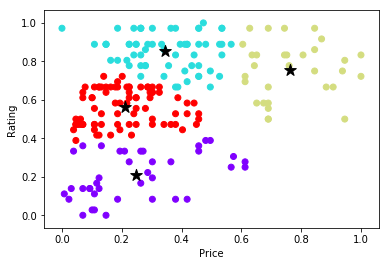

In [145]:
k4price = Kmeans(4,"Price")
print("cluster group:",k4price)

Centroid = [[0.45377898 0.76670844]
 [0.32051282 0.34508547]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


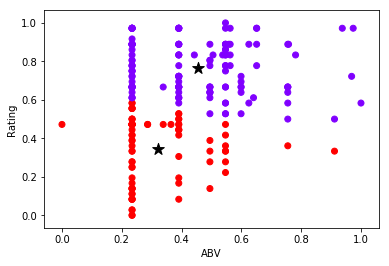

In [146]:
k2abv = Kmeans(2,"ABV")
print("cluster group:",k2abv)

Centroid = [[0.29895833 0.76555556]
 [0.62015703 0.73300166]
 [0.30985809 0.32407407]]
cluster group: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1
 1 1 2 2 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1]


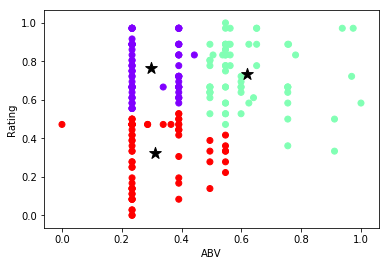

In [147]:
k3abv = Kmeans(3,"ABV")
print("cluster group:",k3abv)

Centroid = [[0.62646329 0.73368607]
 [0.32169118 0.18464052]
 [0.3125     0.85474537]
 [0.30224116 0.53577441]]
cluster group: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 3 1 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 0 0
 3 0 3 3 3 3 3 3 0 3 0 0 0 3 0 3 3 3 3 3 3 0 3 0 0 3 0 3 0 0 0 0 3 3 3 3 3
 3 3 0 3 3 0 3 0 3 0 0 3 3 0 0 0 0 2 3 0 2 2 2 2 0 2 2 0 2 2 2 0 2 0 0 2 2
 0 2 0 2 0 2 2 0 0 0 2 0 0 2 2 0 0 2 2 0 0 2 0 2 0 0 0 0 0 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 0 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 2 0 0 2]


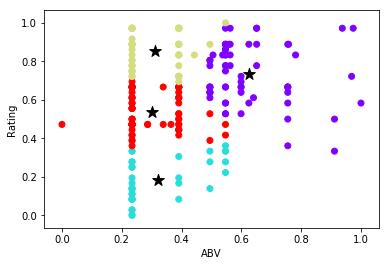

In [148]:
k4abv = Kmeans(4,"ABV")
print("cluster group:",k4abv)

# Use Elbow Method for selecting the optimal number of cluster

In [114]:
def elbow_method(attribute):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(wk[[attribute, 'Rating']])
        Sum_of_squared_distances.append(km.inertia_)
        
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()


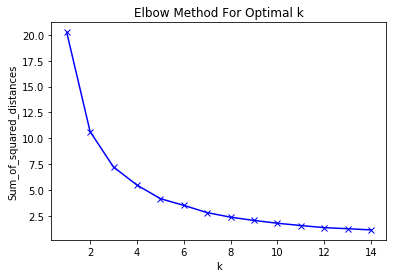

In [115]:
elbow_method('ABV')

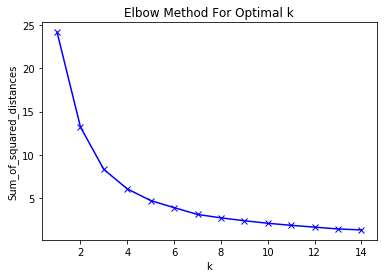

In [116]:
elbow_method('Price')

In [ ]:
"""
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(wk.drop('Rating',axis=1))
    Sum_of_squared_distances.append(km.inertia_)"""

In [ ]:
"""plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()"""

# The best number of cluster is 3

# Workflow 2

In [117]:
def converter(cluster):
    if cluster=='low':
        return 0
    elif cluster=='medium':
        return 1
    else:
        return 2

In [118]:
label = np.array(['low' if d <= 1/3  else 'medium' if d <= 2/3 else 'high' for d in data[:,0]]) # Convert rating to low medium high

In [ ]:
wk['Cluster'] = wk['Rating'].apply(converter)

In [ ]:
wk

In [ ]:
print(confusion_matrix(wk['Cluster'],kmeans.labels_))
print(classification_report(wk['Cluster'],kmeans.labels_))